#  Prios and Posterior : The binomial case <a class="anchor" id="chapter binomial prior"></a>

In this Chapter we will understand how the prior and posterior should be built, the consequences of the priors on the posteriors and some hint on the mathematical background.


This chapter will be focused on the Binomial distribution which will be largely used in many applications, however next chapter will be focused on other distribution that can suit situations not covered by the binomial as much as a general framework to model even more general situation.


Before to start, let's review how the choise of the prior will affect the posterior.

Let's fix an uniform prior first and let's see in the next example (taken from the [first chapter of Bayesian Method for hacker](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) ) how the posterior will change as soon as we collect more data:

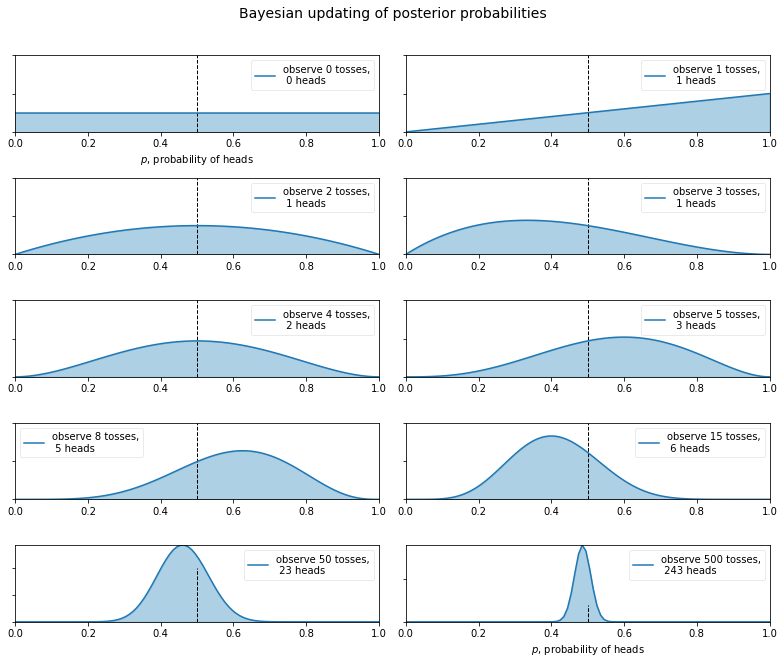

In [14]:
import warnings
warnings.filterwarnings('ignore')
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1],random_state=123)
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

This is the hearth of Bayesian approach: the more data you collect, the sooner you converge to a final stable posterior. After few observations the initial belief is changed, but adding few observation more will change the global distribution until a more stable and peaked distribution is reached. 


Let's see what happen if we start from another prior distribution:

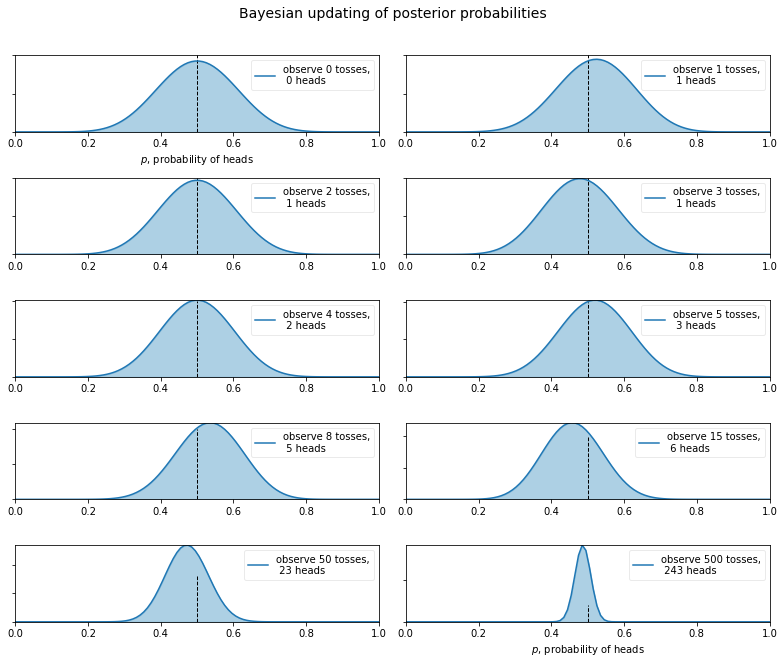

In [16]:
import warnings
warnings.filterwarnings('ignore')
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1],random_state=123)
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 11 + heads, 11 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In this case, we started from a different prior closer to the expected ones and again just by collecting more data the shape and dispersion will converge to the final one. 


From this simple example is clear that the choise of prior is important and we need to understan how to build the prior, the posterior and quantify how many data we need to reach a convergence.

$\textbf{How we choose the prior?}$ We could try a family of prior for example $P(\theta \leq c)$ for all $c \in R$ but this is computationally complicated.

Moreover we will show that when we have a lot of data, a reasonable choose of prior would not affect the posterior. However there are few exceptions that are related to priors that have to be avoided.

ex. If we choose a prior that is equals to 1 in just one point of all the possible values of the variable like:

$$P(\theta =1/2)=1 $$

In this case the posterior:

$$f(\theta | y)\varpropto f(y|\theta) f(\theta)= f(\theta) $$

The choose of the delta prior will project the posterior in that unique point that have a prio different from zero.

In Bayesian approach, events with prior probability exactly equals to 0 or 1 will have posterior probability exactly equals to 0 or 1. Thus we need to NOT use those Priors.

A useful concept to select the prios is the following

### Prior Calibration \& Predictive prior interval

The prior calibration process consists in computing a predictive interval that will contain a $95\%$ of new cases that will fall there (this is the interval of data $y$ rather than $\theta$):

$$f(y)= \int f(y|\theta) f(\theta) d\theta= \int f(y,\theta) d\theta $$
Note the last element $f(y,\theta)$ is the joint probability of $y$ and $\theta$.

Remember in the first chapter we recall the joint probability $\textrm{P(A} \cap \textrm{B)}$ and we saw that 
$\textrm{P(A|B)} = \frac{\textrm{P(A} \cap \textrm{B)}}{\textrm{P(B)}}$

Now in term of data analysis we have 

$$f(y|\theta)= \frac{f(y,\theta)}{f(\theta)}$$
Multiplying for $f(\theta) \Rightarrow$

$$f(y|\theta) f(\theta)= f(y,\theta)$$

The likelihood ($f(y|\theta)$) times the prio ($f(\theta)$) is the join distribution for data and parameter.


The prior predictive interval are useful because they reveal the consequences of the prior at the data level.  

```{hint} 
The prior predictive interval are useful because they reveal the consequences of the prior at the data level.  

In other words, the prior predictive intervals show the distribution of the data which we think we were going to obtain before we see the data.
```

Again, the prior predictive distribution is 

$$f(y)= \int f(y,\theta) d\theta$$



```{admonition} Example


We flip a coin 10 times and we count the number of heads. We want the predictive prior distribution: How many heads we predict we are going to see?

$$ X = \textrm{number of head} = \sum_{i=1}^{10} Y_i$$
where $Y_i$ is the output of each coin.

Prior for $f(\theta) = I_{\{0 \leq \theta \leq 1 \}}$ with the hypothesis that all possible coin are equally likely.

The predicive distribution of number of heads $\Rightarrow$:

$$f(X)= \int f(X|\theta) f(\theta) d\theta = \textrm{considering a binomial likelihood}= \int_{0}^{1} \frac{10!}{x!(10-x)!} \theta^x (1-\theta)^{(10-x)} 1 d\theta$$

To evaluate the integral we need to use the gamma and beta function:

$$ n! =  \Gamma(n+1)$$


$$ z \sim Beta(\alpha,\beta)  $$


$$ f(z) = \frac{\Gamma(\alpha +\beta)}{\Gamma(\alpha)\Gamma(\beta)} z^{\alpha-1} (1-z)^{\beta-1}$$


So $\Rightarrow$:

$$
f(x)= \int_{0}^{1} \frac{\Gamma(11)}{\Gamma(x+1)\Gamma(11-x)} \theta^{(x+1)-1} (1-\theta)^{(11-x)-1} d\theta=

\frac{\Gamma(11)}{\Gamma(12)} \int_{0}^{1} \frac{\Gamma(12)}{\Gamma(x+1)\Gamma(11-x)} \theta^{(x+1)-1} (1-\theta)^{(11-x)-1} d\theta
$$


Now note that 

$$ \int_{0}^{1} \frac{\Gamma(12)}{\Gamma(x+1)\Gamma(11-x)} \theta^{(x+1)-1} (1-\theta)^{(11-x)-1} d\theta = \textrm{is the integral of the density function} =\int_{0}^{1} f(z) dz = 1$$

The previous predictive distribution of the number of head is simplified to 

$$ f(x)= \frac{\Gamma(11)}{\Gamma(12)} =\frac{11!}{12!}=\frac{1}{11}
\tag{for $x \in \{0,1,..10\} $}
$$ 

Starting from the uniform prior $f(\theta) = I_{\{0 \leq \theta \leq 1 \}}$ we end up with a predictive of density for X : all possible values of X are equally likely

```


### Posterior predictive distribution

Given that we saw some data, for example given we saw a first flip, what is the predicted probability distribution for the second flip?

$$f(y_2|y_1) = \int f(y_2|\theta , y_1) f(\theta|y_1) d\theta$$

Note that as prio distribution now we use the posterior distribution from the previous output $f(\theta|y_1)$. 
If $Y_2 \perp Y_1$ which means if $Y_2$ is independent from $Y_1$ $\Rightarrow$:

$$\int f(y_2|\theta) f(\theta|y_1) d\theta $$



```{hint}  In other word the posterior predictive distribution $f(y_2|y_1)$ is the distribution of the observation that we would expect for a new experiment given that we have observed the results of our current experiment.
```


```{admonition} Example

Starting with an uniform distribution for $\theta$ and we observe in the first flip a head $Y_1=1$ what we would predict for the second flip?

This is not going to be uniform distribution anymore like in the first step because we have some data already.

$$f(y_2|y_1=1)=\textrm{from the last example of previous chapter, the posterior of previous step is } 2 \theta= 

\int_{0}^{1} \theta^{y_2} (1-\theta)^{(1-y_2)} 2\theta d\theta = \int_{0}^{1} 2 \theta^{y_2}+1 (1-\theta)^{(1-y_2)} d\theta \Rightarrow$$

$$P(y_2=1|y_1=1)= \int_{0}^{1} 2 \theta^{2} d\theta =\frac{2}{3}$$

$$P(y_2=0|y_1=1)= \int_{0}^{1} 2 \theta (1-\theta)  d\theta =\frac{1}{3}$$

Since our prior was uniform, it means that our prior was saying that the probability to have 1 head is equal to have 1 tail so we have 2 heads over 2heads + 1 tail

```

$\textbf{Recap :}$

In this section we will show that when we use a Uniform prior distribution for a Bernoulli Likelihood we will get a beta posterior. Let's start with the likelihood:

$$f(y|\theta)= \theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)} \Rightarrow \tag{for $f(\theta)=I_{\{0 \leq \theta \leq 1\}} $} $$

Let's build the posterior:

$$
f(\theta|y)=\frac{f(y|\theta) f(\theta)} {\int f(y|\theta) f(\theta) d\theta}=\frac{\theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)} I_{\{0 \leq \theta \leq 1\}} }{\int \theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)} I_{\{0 \leq \theta \leq 1\}} d\theta} =

\frac{\theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)} I_{\{0 \leq \theta \leq 1\}} } {\frac{\Gamma(\sum y_i+1) \Gamma(n - \sum y_i+1)}{\Gamma(n+2)}  \int \frac{\Gamma(n+2)}{\Gamma(\sum y_i+1) \Gamma(n - \sum y_i+1)}  \theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)}  d\theta} 
$$

Now given that the all integral is the integral of the density beta function:

$$ \int \frac{\Gamma(n+2)}{\Gamma(\sum y_i+1) \Gamma(n - \sum y_i+1)}  \theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)}  d\theta =1$$
The previous expression is simplified to $\Rightarrow$

$$ f(\theta|y)= \frac{\Gamma(n+2)}{\Gamma(\sum y_i+1) \Gamma(n - \sum y_i+1)} \theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)} I_{\{0 \leq \theta \leq 1\}} $$


To conclude it is evident that:

$$f(\theta|y) \sim Beta(\sum y_i+1, n-\sum y_i+1)  $$


```{important}

The posterior for a uniform prior distribution coupled with a bernoulli likelihood is a beta distribution with the general expression 

$$f(\theta|y) \sim Beta(\sum y_i+1, n-\sum y_i+1)  $$

```

```{admonition} Example

Example:
 flip a coin with unknown probability of head ($\theta$). If we use a Bernoulli likelihood for each coin flip $f(y_1|\theta)=\theta^i (1-\theta_i)^{(1-y_i)} I_{\{0 \le \theta \leq 1\}}$ and a uniform prior for $\theta$, whta is the posterior distribution for $\theta$ if we observe (H,H,T) where H is head ($Y=1$) and T is tail ($Y=0$)
 
 Answer: Beta(3,2)
    
```


### Conjugate Priors

We will try to generalize further the previous results. 


From the theory we know that a specific choise of likelihood combined with a family of prior will give a specific family of posterior. Those are called conjugate priors. In the table below an example of conjugate priors:

| Likelihood  | Prior  | Posterior  |  
|---|---|---|
| Binomial    | Beta | Beta  | 
| Poisson    | Gamma | Gamma  | 
| Exponential     | Gamma | Gamma  | 
| Normal (mean unknown)    | Normal | Normal  | 
| Normal (variance unknown)   | Inverse Gamma | Inverse Gamma  | 
| Normal (variance and mean unknown)  | Normal/Gamma | Normal/Gamma  | 


In this section we are focused on the Beta prior conjugate with the binomial likelihood. Coming back to our example:

Let's remind that the uniform distribution that we have used for the prior distribution so far, is a specif case from the Beta distribution with $\alpha =\beta=1$ and also that any Beta distribution is conjugate for the Bernoulli distribution. In order word, any Beta prior will give a Beta posterior usign a Bernoulli Likelihood. 

Generalizing:

$$
f(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{(\alpha -1)} (1-\theta)^{(\beta -1)} I_{\{ 0 \leq \theta \leq 1\}}
$$

$$
f(\theta|y)\varpropto f(y|\theta) f(\theta) = \theta^{\sum y_i} (1-\theta)^{(n-\sum y_i)} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{(\alpha -1)} (1-\theta)^{(\beta -1)} I_{\{ 0 \leq \theta \leq 1\}} 
\varpropto 
\theta^{(\alpha+\sum y_i -1)} (1-\theta)^{(\beta+n-\sum y_i -1)} I_{\{ 0 \leq \theta \leq 1\}} \Rightarrow 
$$




```{important} 

The general expression for the posterior starting from a binomial distribution with a beta prior is:

$$f(\theta| y) \sim Beta(\alpha+\sum y_i, \beta+n-\sum y_i)$$

where $\alpha and \beta$ are the parameter for our Beta Prior distribution. 

```


$\textbf{Conjugate Family:}$

The conjugate family are the family of function that if used as prio in conjuction with a likelihood choise, they give as posterior the same family of function. For example we saw that the Beta function is conjugate with the Bernoulli Likelihood.


With conjugate family we can get a closed form solution for the posterior and the integral otherwise we end up in integral complicated to be solved. If the family is flexible, you can find a member of that family that closely represent your belief. 


We can thinks at it as a hierarchical model starting with a bernouilli likelihood $\Rightarrow $

$$y_1,...,y_n \sim B(\theta) \tag{likelihood} $$


$$\Rightarrow \theta \textrm{  prior is a  } Beta(\alpha,\beta) \textrm{   depending on   }\alpha, \beta $$


$$\Rightarrow \alpha,\beta = \alpha_0,\beta_0$$ 
where $\alpha,\beta$ are hyperparameter that in the simple configuration just have a value while in a more complex problem we can give a prior distribution and extend in this manner the model. 


Again from a prior $Beta(\alpha,\beta)$ we ended up in a posterior $Beta(\alpha+\sum y_i, \beta+n-\sum y_i)$ where $\alpha +\beta$ are called effective sample size of prior. Let's see why this sum is so important.


The mean value of the $Beta$ is $\frac{\alpha}{\alpha + \beta}$


```{important} 

The mean value of the posterior is $\frac{\alpha + \sum y_i}{\alpha + \sum y_i +\beta + n - \sum y_i}=\frac{\alpha + \sum y_i}{\alpha  +\beta + n }= \frac{\alpha + \beta}{\alpha + \beta +n} \frac{\alpha}{\alpha+\beta}+\frac{n}{\alpha + \beta +n} \frac{\sum y_i}{n}$

```



This last equation is extremely interesting because it tells us that the $\textbf{posterior mean}$ is equals to the $\textbf{prior weight}$ X $\textbf{the prior mean}$ + $\textbf{the data weight}$ X $\textbf{data mean}$

Note actually that the weigth sums to 1 :

$$\frac{\alpha + \beta}{\alpha + \beta +n} + \frac{n}{\alpha + \beta +n}=1$$



```{important} 

Very important: note that the weight for the prio has n to the denominator only. The weight factor give also an idea of how many data size you need to have to avois that the prior distribution choise overcome on the date in the posterior distribution.

```


If $\alpha +\beta \ll n$ the data weight is more important in the posterior than the prior factor. 
If $\alpha +\beta \gg n$ the posterior will be largely driven by the prior. 


Recall that the $95\%$ CI for $\theta$ is $\theta \pm 1.96 \sqrt{\frac{\theta (1-\theta)}{n}}$. Using the posterior distribution for Beta we can create a interval of 95$\%$ of probability that contains $\theta$. 

```{admonition} Example


An engineer wants to assess the reliability of a new chemical refinement process by measuring $\theta$, $\textbf{the proportion of samples that fail}$ a battery of tests. These tests are expensive, and the budget only allows 20 tests on randomly selected samples. Assuming each test is independent, she assigns a binomial likelihood where X counts the samples which fail. Historically, new processes pass about half of the time, so she assigns a $Beta(2,2)$ prior for $\theta$ (prior mean 0.5 and prior sample size 4). The outcome of the tests is 6 fails and 14 passes.

Aswer to the following questions:


* What is the posterior distribution for $\theta$? 

(Answer : $Beta(8,16)$)

* What is the  the upper end of an equal-tailed 95% credible interval for $\theta$?

Answer(0.53 - in python beta.ppf(0.975,8,16) )

* The engineer tells you that the process is considered promising and can proceed to another phase of testing if we are $90\%$ sure that the failure rate is less than $.35$. Calculate the posterior probability $P(\theta < .35| x)$. In your role as the statistician, would you say that this new chemical should pass?

Answer: No because $P(\theta<.35∣x)<0.9$. (in python: beta.cdf(0.35,8,16)

* It is discovered that the budget will allow five more samples to be tested. These tests are conducted and none of them fail.Calculate the new posterior probability $P(\theta < .35 | x_1, x_2)$. In your role as the statistician, would you say that this new chemical should pass (with the same requirement as in the previous question)?

Answer: No, because $P(θ<.35| x_1, x_2))<0.9$ (in python beta.cdf(0.35,8,21)
```

